#Week 12

#Exactly what we've done on Week 11

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
DataFolder_Path = "/content/gdrive/MyDrive/EETBS /Data"

Importing the modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
ConsumptionFileName= "consumption_5545.csv"
TemperatureFileName= "Austin_weather_2014.csv"
IrradianceFileName= "irradiance_2014_gen.csv"



Finding the path of the files we need


In [ ]:
# The ugly way !
ConsumptionFilePath = "/content/gdrive/MyDrive/EETBS /Data/consumption_5545.csv"


In [ ]:
# I you have many files this can be a better option 
ConsumptionFilePath = os.path.join(DataFolder_Path,ConsumptionFileName)
 # the other method was writing DataFolder_Path + "/" + ConsumptionFileName, the problem with this
 # is that this slash is different in windows and Linux/mac

In [ ]:
ConsumptionFilePath

'/content/gdrive/MyDrive/EETBS /Data/consumption_5545.csv'

In [ ]:
TemperatureFilePath  = os.path.join(DataFolder_Path,TemperatureFileName)
IrradianceFilePath = os.path.join(DataFolder_Path,IrradianceFileName)

In [ ]:
IrradianceFilePath

'/content/gdrive/MyDrive/EETBS /Data/irradiance_2014_gen.csv'

importing the datasets as dataframes 

Importing the consumption file

In [ ]:
DF_consumption = pd.read_csv(ConsumptionFilePath,sep=",", index_col=0, parse_dates=[0])
DF_consumption

,air conditioner_5545
2014-01-01 06:00:00,0.0
2014-01-01 07:00:00,0.0
2014-01-01 08:00:00,0.0
2014-01-01 09:00:00,0.0
2014-01-01 10:00:00,0.0
...,...
2014-12-31 01:00:00,NaN
2014-12-31 02:00:00,NaN
2014-12-31 03:00:00,NaN
2014-12-31 04:00:00,NaN


In [ ]:
DF_consumption.index

DatetimeIndex(['2014-01-01 06:00:00', '2014-01-01 07:00:00',
               '2014-01-01 08:00:00', '2014-01-01 09:00:00',
               '2014-01-01 10:00:00', '2014-01-01 11:00:00',
               '2014-01-01 12:00:00', '2014-01-01 13:00:00',
               '2014-01-01 14:00:00', '2014-01-01 15:00:00',
               ...
               '2014-12-30 20:00:00', '2014-12-30 21:00:00',
               '2014-12-30 22:00:00', '2014-12-30 23:00:00',
               '2014-12-31 00:00:00', '2014-12-31 01:00:00',
               '2014-12-31 02:00:00', '2014-12-31 03:00:00',
               '2014-12-31 04:00:00', '2014-12-31 05:00:00'],
              dtype='datetime64[ns]', length=8736, freq=None)

Importing the weather file

In [ ]:
DF_weather = pd.read_csv(TemperatureFilePath,sep=";") # decimal = ".", for italian resources #decimal=","


In [ ]:
DF_weather = pd.read_csv(TemperatureFilePath,sep=";",index_col = ["localhour"], 
                         parse_dates=["localhour"], 
                         date_parser= lambda col: pd.to_datetime(col, utc=True).tz_convert("US/Central").tz_localize(None)) 

In [ ]:
DF_weather.head()

,latitude,longitude,tz_offset,summary,ozone,ozone_error,temperature,temperature_error,dew_point,dew_point_error,humidity,humidity_error,visibility,visibility_error,apparent_temperature,apparent_temperature_error,pressure,pressure_error,wind_speed,wind_speed_error,cloud_cover,cloud_cover_error,wind_bearing,precip_intensity,precip_intensity_error,precip_probability,precip_type
localhour,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,30.292432,-97.699662,-6,Clear,NaN,NaN,40.36,NaN,30.12,NaN,0.67,NaN,10.00,NaN,36.89,NaN,1025.10,NaN,5.00,NaN,0.0,NaN,200.0,0.0,NaN,0.0,NaN
2014-01-01 01:00:00,30.292432,-97.699662,-6,Clear,NaN,NaN,38.11,NaN,30.46,NaN,0.74,NaN,9.77,NaN,33.79,NaN,1024.50,NaN,5.60,NaN,0.0,NaN,196.0,0.0,NaN,0.0,NaN
2014-01-01 02:00:00,30.292432,-97.699662,-6,Clear,NaN,NaN,38.65,NaN,31.92,NaN,0.77,NaN,8.46,NaN,35.80,NaN,1024.03,NaN,3.96,NaN,0.0,NaN,191.0,0.0,NaN,0.0,NaN
2014-01-01 03:00:00,30.292432,-97.699662,-6,Clear,NaN,NaN,38.47,NaN,30.99,NaN,0.74,NaN,8.89,NaN,36.50,NaN,1023.43,NaN,3.11,NaN,0.0,NaN,184.0,0.0,NaN,0.0,NaN
2014-01-01 04:00:00,30.292432,-97.699662,-6,Clear,NaN,NaN,38.00,NaN,30.66,NaN,0.75,NaN,9.84,NaN,33.86,NaN,1023.07,NaN,5.33,NaN,0.0,NaN,190.0,0.0,NaN,0.0,NaN


In [ ]:
DF_temperature = DF_weather[["temperature"]]
DF_temperature.head()

,temperature
localhour,
2014-01-01 00:00:00,40.36
2014-01-01 01:00:00,38.11
2014-01-01 02:00:00,38.65
2014-01-01 03:00:00,38.47
2014-01-01 04:00:00,38.00


Importing the irradiance (PV panel gen !) data

In [ ]:
DF_irradiance = pd.read_csv(IrradianceFilePath,sep=";", index_col=["localhour"], parse_dates=["localhour"])


In [ ]:
DF_irradiance.head()

,dataid,use,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,bedroom2,bedroom3,bedroom4,bedroom5,car1,clotheswasher1,clotheswasher_dryg1,diningroom1,diningroom2,dishwasher1,disposal1,drye1,dryg1,freezer1,furnace1,furnace2,garage1,garage2,gen,grid,heater1,housefan1,icemaker1,jacuzzi1,kitchen1,kitchen2,kitchenapp1,kitchenapp2,lights_plugs1,lights_plugs2,lights_plugs3,lights_plugs4,lights_plugs5,lights_plugs6,livingroom1,livingroom2,microwave1,office1,outsidelights_plugs1,outsidelights_plugs2,oven1,oven2,pool1,pool2,poollight1,poolpump1,pump1,range1,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
localhour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,8236,0.303150,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0051,0.0306,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.019717,NaN,NaN,NaN,-0.005967,0.303150,NaN,NaN,NaN,NaN,NaN,NaN,0.004,0.0,0.0036,0.00115,NaN,NaN,NaN,NaN,NaN,NaN,0.075033,0.0079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:00:00,8236,0.358567,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.171067,NaN,NaN,NaN,-0.006317,0.358567,NaN,NaN,NaN,NaN,NaN,NaN,0.004,0.0,0.0000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.074750,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 02:00:00,8236,0.367283,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.178183,NaN,NaN,NaN,-0.006350,0.367283,NaN,NaN,NaN,NaN,NaN,NaN,0.004,0.0,0.0000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.074883,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 03:00:00,8236,0.350333,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.152017,NaN,NaN,NaN,-0.006267,0.350333,NaN,NaN,NaN,NaN,NaN,NaN,0.004,0.0,0.0000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.074967,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 04:00:00,8236,0.562517,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.363717,NaN,NaN,NaN,-0.006767,0.562517,NaN,NaN,NaN,NaN,NaN,NaN,0.004,0.0,0.0012,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.074283,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
DF_irradiance = DF_irradiance[["gen"]]
DF_irradiance.head()

,gen
localhour,
2014-01-01 00:00:00,-0.005967
2014-01-01 01:00:00,-0.006317
2014-01-01 02:00:00,-0.006350
2014-01-01 03:00:00,-0.006267
2014-01-01 04:00:00,-0.006767


In [ ]:
DF_irradiance.loc[DF_irradiance["gen"]<0,"gen"]=0

In [ ]:
DF_irradiance.head()

,gen
localhour,
2014-01-01 00:00:00,0.0
2014-01-01 01:00:00,0.0
2014-01-01 02:00:00,0.0
2014-01-01 03:00:00,0.0
2014-01-01 04:00:00,0.0


##Joining the dataframes !

In [ ]:
DF_joined  = DF_consumption.join([DF_temperature,DF_irradiance])
DF_joined.head()

,air conditioner_5545,temperature,gen
2014-01-01 06:00:00,0.0,39.36,0.000000
2014-01-01 07:00:00,0.0,37.86,0.052800
2014-01-01 08:00:00,0.0,38.97,0.773583
2014-01-01 09:00:00,0.0,45.85,2.097700
2014-01-01 10:00:00,0.0,51.42,3.036750


Renaming the columns

The names are currently ugly!

In [ ]:
DF_joined = DF_joined.rename(columns ={"air conditioner_5545":"consumption","gen":"Irradiance" })

In [ ]:
DF_joined

,consumption,temperature,Irradiance
2014-01-01 06:00:00,0.0,39.36,0.000000
2014-01-01 07:00:00,0.0,37.86,0.052800
2014-01-01 08:00:00,0.0,38.97,0.773583
2014-01-01 09:00:00,0.0,45.85,2.097700
2014-01-01 10:00:00,0.0,51.42,3.036750
...,...,...,...
2014-12-31 01:00:00,NaN,38.96,0.000000
2014-12-31 02:00:00,NaN,38.81,0.000000
2014-12-31 03:00:00,NaN,39.33,0.000000
2014-12-31 04:00:00,NaN,39.54,0.000000


In [ ]:
DF_joined.head()

,consumption,temperature,Irradiance
2014-01-01 06:00:00,0.0,39.36,0.000000
2014-01-01 07:00:00,0.0,37.86,0.052800
2014-01-01 08:00:00,0.0,38.97,0.773583
2014-01-01 09:00:00,0.0,45.85,2.097700
2014-01-01 10:00:00,0.0,51.42,3.036750


In [ ]:
DF_mod = DF_joined.copy() #In order to evade that DF_joined would not change once I change DF_mod
DF_mod["temperature"] = DF_mod["temperature"].shift(-1)

In [ ]:
DF_mod.head()

,consumption,temperature,Irradiance
2014-01-01 06:00:00,0.0,37.86,0.000000
2014-01-01 07:00:00,0.0,38.97,0.052800
2014-01-01 08:00:00,0.0,45.85,0.773583
2014-01-01 09:00:00,0.0,51.42,2.097700
2014-01-01 10:00:00,0.0,57.66,3.036750


Handling NAN values


In [ ]:
DF_mod.dropna(inplace = True)
DF_mod

,consumption,temperature,Irradiance
2014-01-01 06:00:00,0.0,37.86,0.000000
2014-01-01 07:00:00,0.0,38.97,0.052800
2014-01-01 08:00:00,0.0,45.85,0.773583
2014-01-01 09:00:00,0.0,51.42,2.097700
2014-01-01 10:00:00,0.0,57.66,3.036750
...,...,...,...
2014-12-30 20:00:00,0.0,40.37,0.000000
2014-12-30 21:00:00,0.0,40.15,0.000000
2014-12-30 22:00:00,0.0,40.00,0.000000
2014-12-30 23:00:00,0.0,38.74,0.000000


 Pay attention that droping the rows is not always the best solution !
 sometime you can replace the NaN with zero or for example with an average value 

In [ ]:
Joined_DF_FileName= "joined_DF_Razmjoo.csv"
Joined_DF_FilePath = os.path.join(DataFolder_Path,Joined_DF_FileName)
DF_mod.to_csv(Joined_DF_FilePath)


Describe and info commands

In [ ]:
DF_mod.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8670 entries, 2014-01-01 06:00:00 to 2014-12-31 00:00:00
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   consumption  8670 non-null   float64
 1   temperature  8670 non-null   float64
 2   Irradiance   8670 non-null   float64
dtypes: float64(3)
memory usage: 270.9 KB


In [ ]:
DF_mod.describe()

,consumption,temperature,Irradiance
count,8670.000000,8670.000000,8670.000000
mean,345.707233,67.718923,0.975470
std,655.969001,16.255873,1.421280
min,0.000000,20.730000,0.000000
25%,0.000000,56.632500,0.000000
50%,0.000000,70.255000,0.012242
75%,411.575000,79.480000,1.669108
max,2841.000000,101.050000,5.099667


In [ ]:
DF_mod["temperature -1h"] = DF_mod["temperature"].shift(-1)
DF_mod["temperature -2h"] = DF_mod["temperature"].shift(-2)

In [ ]:
DF_mod.head()

,consumption,temperature,Irradiance,temperature -1h,temperature -2h
2014-01-01 06:00:00,0.0,37.86,0.000000,38.97,45.85
2014-01-01 07:00:00,0.0,38.97,0.052800,45.85,51.42
2014-01-01 08:00:00,0.0,45.85,0.773583,51.42,57.66
2014-01-01 09:00:00,0.0,51.42,2.097700,57.66,60.49
2014-01-01 10:00:00,0.0,57.66,3.036750,60.49,63.36


Automating the pre-processing: lagged values

In [ ]:
LagStart = 1
lagEnd = 6
LagInterval = 1
ColumnName = "temperature"
df = DF_mod

In [ ]:
for i in range(LagStart,lagEnd+1,LagInterval):
  newColumnName = ColumnName +" -"+str(i)+"h"
  df[newColumnName] = df[ColumnName].shift(i)
  df.dropna(inplace=True) #This applies it to the dataframe: if not you should use: df = df.dropna()

In [ ]:
def laggedColumnCreator(df,ColumnName,LagStart,lagEnd,LagInterval):
  for i in range(LagStart,lagEnd+1,LagInterval):
    newColumnName = ColumnName +" -"+str(i)+"h"
    df[newColumnName] = df[ColumnName].shift(i)
    df.dropna(inplace=True)
  return df

In [ ]:
DF_mod = laggedColumnCreator(DF_mod,"temperature",1,6,1)
DF_mod.head()

,consumption,temperature,Irradiance,temperature -1h,temperature -2h,temperature -3h,temperature -4h,temperature -5h,temperature -6h
2014-01-02 03:00:00,0.0,40.63,0.000000,45.27,48.82,51.75,53.09,49.05,53.57
2014-01-02 04:00:00,0.0,38.09,0.000000,40.63,45.27,48.82,51.75,53.09,49.05
2014-01-02 05:00:00,0.0,36.82,0.000000,38.09,40.63,45.27,48.82,51.75,53.09
2014-01-02 06:00:00,0.0,34.71,0.000000,36.82,38.09,40.63,45.27,48.82,51.75
2014-01-02 07:00:00,0.0,33.90,0.054383,34.71,36.82,38.09,40.63,45.27,48.82


#Start of Week 12

##Read a fresh read from our data and parsing date/time

In [ ]:
DF_mod=pd.read_csv(os.path.join(DataFolder_Path,Joined_DF_FileName),index_col=0, parse_dates=[0])
DF_mod.head(3)

,consumption,temperature,Irradiance
2014-01-01 06:00:00,0.0,37.86,0.000000
2014-01-01 07:00:00,0.0,38.97,0.052800
2014-01-01 08:00:00,0.0,45.85,0.773583


##Creating lagged values

In [ ]:
DF_mod = laggedColumnCreator(DF_mod,"temperature",1,6,1)
DF_mod.head()

,consumption,temperature,Irradiance,temperature -1h,temperature -2h,temperature -3h,temperature -4h,temperature -5h,temperature -6h
2014-01-02 03:00:00,0.0,40.63,0.000000,45.27,48.82,51.75,53.09,49.05,53.57
2014-01-02 04:00:00,0.0,38.09,0.000000,40.63,45.27,48.82,51.75,53.09,49.05
2014-01-02 05:00:00,0.0,36.82,0.000000,38.09,40.63,45.27,48.82,51.75,53.09
2014-01-02 06:00:00,0.0,34.71,0.000000,36.82,38.09,40.63,45.27,48.82,51.75
2014-01-02 07:00:00,0.0,33.90,0.054383,34.71,36.82,38.09,40.63,45.27,48.82


Same for 24h of consumption:

In [ ]:
DF_mod = laggedColumnCreator(DF_mod,"consumption",1,24,1)
DF_mod.head()

,consumption,temperature,Irradiance,temperature -1h,temperature -2h,temperature -3h,temperature -4h,temperature -5h,temperature -6h,consumption -1h,consumption -2h,consumption -3h,consumption -4h,consumption -5h,consumption -6h,consumption -7h,consumption -8h,consumption -9h,consumption -10h,consumption -11h,consumption -12h,consumption -13h,consumption -14h,consumption -15h,consumption -16h,consumption -17h,consumption -18h,consumption -19h,consumption -20h,consumption -21h,consumption -22h,consumption -23h,consumption -24h
2014-01-14 15:00:00,0.0,74.09,3.329300,74.64,72.88,70.88,68.37,63.42,54.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-14 16:00:00,0.0,70.34,2.124267,74.09,74.64,72.88,70.88,68.37,63.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-14 17:00:00,0.0,64.44,0.451467,70.34,74.09,74.64,72.88,70.88,68.37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-14 18:00:00,0.0,61.49,0.000000,64.44,70.34,74.09,74.64,72.88,70.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-14 19:00:00,0.0,59.19,0.000000,61.49,64.44,70.34,74.09,74.64,72.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


For irradiance:

In [ ]:
DF_mod = laggedColumnCreator(DF_mod,"Irradiance",3,6,1) #Here we are starting from 3 hours and lagging until 6 hours! This is due to the delay btwn absorbing by wall and affecting inside.
DF_mod.head()

,consumption,temperature,Irradiance,temperature -1h,temperature -2h,temperature -3h,temperature -4h,temperature -5h,temperature -6h,consumption -1h,consumption -2h,consumption -3h,consumption -4h,consumption -5h,consumption -6h,consumption -7h,consumption -8h,consumption -9h,consumption -10h,consumption -11h,consumption -12h,consumption -13h,consumption -14h,consumption -15h,consumption -16h,consumption -17h,consumption -18h,consumption -19h,consumption -20h,consumption -21h,consumption -22h,consumption -23h,consumption -24h,Irradiance -3h,Irradiance -4h,Irradiance -5h,Irradiance -6h
2014-01-15 09:00:00,0.0,49.51,2.191083,43.73,39.31,39.24,40.81,40.74,42.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0000
2014-01-15 10:00:00,0.0,53.34,3.120000,49.51,43.73,39.31,39.24,40.81,40.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078900,0.000000,0.000000,0.0000
2014-01-15 11:00:00,0.0,57.37,3.865200,53.34,49.51,43.73,39.31,39.24,40.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.862767,0.078900,0.000000,0.0000
2014-01-15 12:00:00,0.0,58.34,4.267967,57.37,53.34,49.51,43.73,39.31,39.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.191083,0.862767,0.078900,0.0000
2014-01-15 13:00:00,0.0,60.00,4.310133,58.34,57.37,53.34,49.51,43.73,39.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.120000,2.191083,0.862767,0.0789


##Adding time-related features

In [ ]:
DF_mod.index

DatetimeIndex(['2014-01-15 09:00:00', '2014-01-15 10:00:00',
               '2014-01-15 11:00:00', '2014-01-15 12:00:00',
               '2014-01-15 13:00:00', '2014-01-15 14:00:00',
               '2014-01-15 15:00:00', '2014-01-15 16:00:00',
               '2014-01-15 17:00:00', '2014-01-15 18:00:00',
               ...
               '2014-12-30 15:00:00', '2014-12-30 16:00:00',
               '2014-12-30 17:00:00', '2014-12-30 18:00:00',
               '2014-12-30 19:00:00', '2014-12-30 20:00:00',
               '2014-12-30 21:00:00', '2014-12-30 22:00:00',
               '2014-12-30 23:00:00', '2014-12-31 00:00:00'],
              dtype='datetime64[ns]', length=8331, freq=None)

By the final line, we can find that our date/time is parsed!

In [ ]:
DF_mod["hour"] = DF_mod.index.hour
DF_mod["sin_hour"] = np.sin(DF_mod.index.hour*(2*np.pi/24)) #As we want PERIODICITY of the sin, we multiply the sin input to result in a fraction of 24h!
DF_mod.head(3)

,consumption,temperature,Irradiance,temperature -1h,temperature -2h,temperature -3h,temperature -4h,temperature -5h,temperature -6h,consumption -1h,consumption -2h,consumption -3h,consumption -4h,consumption -5h,consumption -6h,consumption -7h,consumption -8h,consumption -9h,consumption -10h,consumption -11h,consumption -12h,consumption -13h,consumption -14h,consumption -15h,consumption -16h,consumption -17h,consumption -18h,consumption -19h,consumption -20h,consumption -21h,consumption -22h,consumption -23h,consumption -24h,Irradiance -3h,Irradiance -4h,Irradiance -5h,Irradiance -6h,hour,sin_hour
2014-01-15 09:00:00,0.0,49.51,2.191083,43.73,39.31,39.24,40.81,40.74,42.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,9,0.707107
2014-01-15 10:00:00,0.0,53.34,3.120000,49.51,43.73,39.31,39.24,40.81,40.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078900,0.0000,0.0,0.0,10,0.500000
2014-01-15 11:00:00,0.0,57.37,3.865200,53.34,49.51,43.73,39.31,39.24,40.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.862767,0.0789,0.0,0.0,11,0.258819


In [ ]:
DF_mod["cos_hour"] = np.cos(DF_mod.index.hour*(2*np.pi/24)) #As we want PERIODICITY of the sin, we multiply the sin input to result in a fraction of 24h!
DF_mod.head(3)

,consumption,temperature,Irradiance,temperature -1h,temperature -2h,temperature -3h,temperature -4h,temperature -5h,temperature -6h,consumption -1h,consumption -2h,consumption -3h,consumption -4h,consumption -5h,consumption -6h,consumption -7h,consumption -8h,consumption -9h,consumption -10h,consumption -11h,consumption -12h,consumption -13h,consumption -14h,consumption -15h,consumption -16h,consumption -17h,consumption -18h,consumption -19h,consumption -20h,consumption -21h,consumption -22h,consumption -23h,consumption -24h,Irradiance -3h,Irradiance -4h,Irradiance -5h,Irradiance -6h,hour,sin_hour,cos_hour
2014-01-15 09:00:00,0.0,49.51,2.191083,43.73,39.31,39.24,40.81,40.74,42.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,9,0.707107,-0.707107
2014-01-15 10:00:00,0.0,53.34,3.120000,49.51,43.73,39.31,39.24,40.81,40.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078900,0.0000,0.0,0.0,10,0.500000,-0.866025
2014-01-15 11:00:00,0.0,57.37,3.865200,53.34,49.51,43.73,39.31,39.24,40.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.862767,0.0789,0.0,0.0,11,0.258819,-0.965926


In [ ]:
DF_mod["dayOfWeek"] = DF_mod.index.dayofweek
DF_mod.head(3)

,consumption,temperature,Irradiance,temperature -1h,temperature -2h,temperature -3h,temperature -4h,temperature -5h,temperature -6h,consumption -1h,consumption -2h,consumption -3h,consumption -4h,consumption -5h,consumption -6h,consumption -7h,consumption -8h,consumption -9h,consumption -10h,consumption -11h,consumption -12h,consumption -13h,consumption -14h,consumption -15h,consumption -16h,consumption -17h,consumption -18h,consumption -19h,consumption -20h,consumption -21h,consumption -22h,consumption -23h,consumption -24h,Irradiance -3h,Irradiance -4h,Irradiance -5h,Irradiance -6h,hour,sin_hour,cos_hour,dayOfWeek
2014-01-15 09:00:00,0.0,49.51,2.191083,43.73,39.31,39.24,40.81,40.74,42.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,9,0.707107,-0.707107,2
2014-01-15 10:00:00,0.0,53.34,3.120000,49.51,43.73,39.31,39.24,40.81,40.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078900,0.0000,0.0,0.0,10,0.500000,-0.866025,2
2014-01-15 11:00:00,0.0,57.37,3.865200,53.34,49.51,43.73,39.31,39.24,40.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.862767,0.0789,0.0,0.0,11,0.258819,-0.965926,2


##Weekend flag

In [ ]:
DF_mod.loc[DF_mod["dayOfWeek"]>4,"weekendFlag"] = 1
DF_mod.loc[DF_mod["dayOfWeek"]<5,"weekendFlag"] = 0
DF_mod.loc["2014-06-15 09:00:00"]

consumption            0.000000
temperature           82.240000
Irradiance             0.926367
temperature -1h       79.510000
temperature -2h       77.700000
temperature -3h       75.670000
temperature -4h       75.820000
temperature -5h       76.240000
temperature -6h       75.820000
consumption -1h        0.000000
consumption -2h        0.000000
consumption -3h        0.000000
consumption -4h        0.000000
consumption -5h      223.350000
consumption -6h      250.633333
consumption -7h      333.666667
consumption -8h      352.266667
consumption -9h      826.033333
consumption -10h    1196.333333
consumption -11h    1579.266667
consumption -12h    2036.350000
consumption -13h    2263.683333
consumption -14h     841.316667
consumption -15h     631.066667
consumption -16h     721.800000
consumption -17h     890.650000
consumption -18h     810.033333
consumption -19h     888.900000
consumption -20h     980.833333
consumption -21h     628.116667
consumption -22h     320.850000
consumpt

In [ ]:
DF_mod["month"] = DF_mod.index.month
DF_mod["weekOfYear"] = DF_mod.index.week

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


##Working hour flag

In [ ]:
DF_mod.loc[:,"workingHour"] = 0
DF_mod.loc[(DF_mod["hour"]>8) & (DF_mod["hour"]<19),"workingHour"] = 1 #Defining "or" in conditions of numpy and pandas, you should use "|", for "and" you should use "&"
DF_mod[["hour","workingHour"]]

,hour,workingHour
2014-01-15 09:00:00,9,1
2014-01-15 10:00:00,10,1
2014-01-15 11:00:00,11,1
2014-01-15 12:00:00,12,1
2014-01-15 13:00:00,13,1
...,...,...
2014-12-30 20:00:00,20,0
2014-12-30 21:00:00,21,0
2014-12-30 22:00:00,22,0
2014-12-30 23:00:00,23,0


**NOTE:** Defining "or" in conditions of numpy and pandas, you should use "|", for "and" you should use "&"

In [ ]:
DF_mod.head(3)

,consumption,temperature,Irradiance,temperature -1h,temperature -2h,temperature -3h,temperature -4h,temperature -5h,temperature -6h,consumption -1h,consumption -2h,consumption -3h,consumption -4h,consumption -5h,consumption -6h,consumption -7h,consumption -8h,consumption -9h,consumption -10h,consumption -11h,consumption -12h,consumption -13h,consumption -14h,consumption -15h,consumption -16h,consumption -17h,consumption -18h,consumption -19h,consumption -20h,consumption -21h,consumption -22h,consumption -23h,consumption -24h,Irradiance -3h,Irradiance -4h,Irradiance -5h,Irradiance -6h,hour,sin_hour,cos_hour,dayOfWeek,weekendFlag,month,weekOfYear,workingHour
2014-01-15 09:00:00,0.0,49.51,2.191083,43.73,39.31,39.24,40.81,40.74,42.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,9,0.707107,-0.707107,2,0.0,1,3,1
2014-01-15 10:00:00,0.0,53.34,3.120000,49.51,43.73,39.31,39.24,40.81,40.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078900,0.0000,0.0,0.0,10,0.500000,-0.866025,2,0.0,1,3,1
2014-01-15 11:00:00,0.0,57.37,3.865200,53.34,49.51,43.73,39.31,39.24,40.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.862767,0.0789,0.0,0.0,11,0.258819,-0.965926,2,0.0,1,3,1


By this "FLAGGING", we can flag out some important characteristics of the system that we "ASSUME" it might e useful and using them as a mean to modelling our system.

Potentially we could define a function that dies all this for us:

##Time-related function

In [ ]:
def CreateTimeRelatedFeatures(inputDf):
  """Pay attention to parse the date/times."""
  inputDf["hour"] = DF_mod.index.hour
  inputDf["sin_hour"] = np.sin(DF_mod.index.hour*(2*np.pi/24))
  inputDf["cos_hour"] = np.cos(DF_mod.index.hour*(2*np.pi/24))
  inputDf["dayOfWeek"] = DF_mod.index.dayofweek
  #Weekend flag
  inputDf.loc[inputDf["dayOfWeek"]>4,"weekendFlag"] = 1
  inputDf.loc[inputDf["dayOfWeek"]<5,"weekendFlag"] = 0
  inputDf["month"] = inputDf.index.month
  inputDf["weekOfYear"] = inputDf.index.week
  #Working hour flag
  inputDf.loc[:,"workingHour"] = 0
  inputDf.loc[(inputDf["hour"]>8) & (inputDf["hour"]<19),"workingHour"] = 1
  return inputDf


In [ ]:
DF_mod = CreateTimeRelatedFeatures(DF_mod)
DF_mod.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  # Remove the CWD from sys.path while we load stuff.


,consumption,temperature,Irradiance,temperature -1h,temperature -2h,temperature -3h,temperature -4h,temperature -5h,temperature -6h,consumption -1h,consumption -2h,consumption -3h,consumption -4h,consumption -5h,consumption -6h,consumption -7h,consumption -8h,consumption -9h,consumption -10h,consumption -11h,consumption -12h,consumption -13h,consumption -14h,consumption -15h,consumption -16h,consumption -17h,consumption -18h,consumption -19h,consumption -20h,consumption -21h,consumption -22h,consumption -23h,consumption -24h,Irradiance -3h,Irradiance -4h,Irradiance -5h,Irradiance -6h,hour,sin_hour,cos_hour,dayOfWeek,weekendFlag,month,weekOfYear,workingHour
2014-01-15 09:00:00,0.0,49.51,2.191083,43.73,39.31,39.24,40.81,40.74,42.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,9,0.707107,-0.707107,2,0.0,1,3,1
2014-01-15 10:00:00,0.0,53.34,3.120000,49.51,43.73,39.31,39.24,40.81,40.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078900,0.0000,0.0,0.0,10,0.500000,-0.866025,2,0.0,1,3,1
2014-01-15 11:00:00,0.0,57.37,3.865200,53.34,49.51,43.73,39.31,39.24,40.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.862767,0.0789,0.0,0.0,11,0.258819,-0.965926,2,0.0,1,3,1


#Implementing machine learning model

##Finding correlations

Finding the **pearson correlation coefficients** between each two parameters:

In [ ]:
DF_mod.corr()

,consumption,temperature,Irradiance,temperature -1h,temperature -2h,temperature -3h,temperature -4h,temperature -5h,temperature -6h,consumption -1h,consumption -2h,consumption -3h,consumption -4h,consumption -5h,consumption -6h,consumption -7h,consumption -8h,consumption -9h,consumption -10h,consumption -11h,consumption -12h,consumption -13h,consumption -14h,consumption -15h,consumption -16h,consumption -17h,consumption -18h,consumption -19h,consumption -20h,consumption -21h,consumption -22h,consumption -23h,consumption -24h,Irradiance -3h,Irradiance -4h,Irradiance -5h,Irradiance -6h,hour,sin_hour,cos_hour,dayOfWeek,weekendFlag,month,weekOfYear,workingHour
consumption,1.000000,0.521694,-0.012671,0.568864,0.608665,0.636873,0.650104,0.647803,0.630338,0.907210,0.810686,0.694266,0.568108,0.435503,0.305258,0.184340,0.080421,-0.003920,-0.067552,-0.108624,-0.124250,-0.108836,-0.068509,-0.005183,0.079421,0.180967,0.299802,0.424185,0.550683,0.667829,0.769738,0.849304,0.899850,0.364558,0.467597,0.533907,0.555446,0.361289,-0.438642,0.212334,-0.014223,-0.005646,0.128467,0.139595,-0.053224
temperature,0.521694,1.000000,0.417423,0.990934,0.968220,0.935043,0.894835,0.850823,0.805879,0.471034,0.419942,0.371947,0.329911,0.295071,0.269407,0.253638,0.247403,0.252209,0.269488,0.298674,0.338157,0.385064,0.436078,0.488178,0.535654,0.575119,0.603939,0.619253,0.620309,0.606395,0.578006,0.538772,0.493124,0.423520,0.372913,0.306220,0.230055,0.203766,-0.264944,-0.245993,0.041149,0.038221,0.161423,0.191578,0.312660
Irradiance,-0.012671,0.417423,1.000000,0.352474,0.265537,0.167233,0.067083,-0.026176,-0.105418,-0.119438,-0.204998,-0.267436,-0.308658,-0.328658,-0.328180,-0.308976,-0.274321,-0.224486,-0.157576,-0.072379,0.030154,0.146167,0.261050,0.367356,0.451607,0.509564,0.531555,0.509566,0.442563,0.343029,0.219730,0.091966,-0.025238,0.560717,0.329463,0.103857,-0.094929,0.167508,-0.237094,-0.740866,-0.028876,-0.030964,-0.034720,-0.026976,0.766392
temperature -1h,0.568864,0.990934,0.352474,1.000000,0.990929,0.968214,0.935037,0.894827,0.850812,0.521706,0.471043,0.419949,0.371950,0.329911,0.295069,0.269404,0.253634,0.247399,0.252205,0.269485,0.298673,0.338158,0.385068,0.436085,0.488189,0.535667,0.575134,0.603957,0.619271,0.620328,0.606413,0.578022,0.538786,0.450939,0.423521,0.372911,0.306214,0.235794,-0.319863,-0.168603,0.039841,0.038064,0.162108,0.192355,0.264039
temperature -2h,0.608665,0.968220,0.265537,0.990929,1.000000,0.990929,0.968213,0.935036,0.894823,0.568866,0.521708,0.471045,0.419950,0.371950,0.329912,0.295069,0.269404,0.253633,0.247398,0.252204,0.269485,0.298673,0.338158,0.385069,0.436086,0.488190,0.535669,0.575136,0.603959,0.619273,0.620330,0.606415,0.578024,0.450111,0.450939,0.423522,0.372911,0.257629,-0.352837,-0.079561,0.038651,0.037957,0.162884,0.193202,0.189562
temperature -3h,0.636873,0.935043,0.167233,0.968214,0.990929,1.000000,0.990929,0.968213,0.935033,0.608662,0.568863,0.521706,0.471043,0.419948,0.371950,0.329911,0.295069,0.269404,0.253634,0.247399,0.252205,0.269486,0.298673,0.338158,0.385068,0.436084,0.488188,0.535666,0.575134,0.603956,0.619270,0.620327,0.606412,0.417312,0.450110,0.450939,0.423521,0.267397,-0.361577,0.014996,0.037684,0.037921,0.163690,0.194073,0.102927
temperature -4h,0.650104,0.894835,0.067083,0.935037,0.968213,0.990929,1.000000,0.990929,0.968212,0.636876,0.608665,0.568865,0.521707,0.471045,0.419949,0.371950,0.329911,0.295069,0.269404,0.253633,0.247398,0.252204,0.269485,0.298673,0.338158,0.385069,0.436086,0.488190,0.535668,0.575136,0.603959,0.619273,0.620330,0.352340,0.417313,0.450111,0.450939,0.262413,-0.345518,0.108591,0.037024,0.038001,0.164521,0.194933,0.013901
temperature -5h,0.647803,0.850823,-0.026176,0.894827,0.935036,0.968213,0.990929,1.000000,0.990928,0.650106,0.636878,0.608666,0.568867,0.521708,0.471045,0.419950,0.371951,0.329912,0.295069,0.269404,0.253633,0.247398,0.252204,0.269485,0.298673,0.338158,0.385069,0.436086,0.488191,0.535669,0.575137,0.603960,0.619274,0.265400,0.352340,0.417313,0.450111,0.237794,

**NOTE:** This indicates the "Correlation" not "Causation". Causation means that one parameter RESULTS from the other one (that are for examle related to each other by causation coefficient)

**NOTE:** Both correlation and causation can be useful, in their relevant time.

##Define target

Choosing the moments that we might have AC consumption:

In [ ]:
DF_mod = DF_mod.loc["2014-03-01":"2014-09-30"]

In [ ]:
DF_target = DF_mod["consumption"]
DF_features = DF_mod.drop("consumption", axis=1)  #Removing column axis=1 called consumption

In [ ]:
DF_features.head(3)

,temperature,Irradiance,temperature -1h,temperature -2h,temperature -3h,temperature -4h,temperature -5h,temperature -6h,consumption -1h,consumption -2h,consumption -3h,consumption -4h,consumption -5h,consumption -6h,consumption -7h,consumption -8h,consumption -9h,consumption -10h,consumption -11h,consumption -12h,consumption -13h,consumption -14h,consumption -15h,consumption -16h,consumption -17h,consumption -18h,consumption -19h,consumption -20h,consumption -21h,consumption -22h,consumption -23h,consumption -24h,Irradiance -3h,Irradiance -4h,Irradiance -5h,Irradiance -6h,hour,sin_hour,cos_hour,dayOfWeek,weekendFlag,month,weekOfYear,workingHour
2014-03-01 00:00:00,55.80,0.0,57.88,58.61,61.53,61.77,65.87,68.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060583,0,0.000000,1.000000,5,1.0,3,9,0
2014-03-01 01:00:00,54.14,0.0,55.80,57.88,58.61,61.53,61.77,65.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0.258819,0.965926,5,1.0,3,9,0
2014-03-01 02:00:00,52.78,0.0,54.14,55.80,57.88,58.61,61.53,61.77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2,0.500000,0.866025,5,1.0,3,9,0


##Importing machine learning models: **LINEAR REGRESSION**

**sklearn** is an awesome library which includes almost any ML model defined (except for some Deep Learning recent models)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(DF_features,DF_target,test_size=0.2,random_state=41234)

In [ ]:
X_test.describe()

,temperature,Irradiance,temperature -1h,temperature -2h,temperature -3h,temperature -4h,temperature -5h,temperature -6h,consumption -1h,consumption -2h,consumption -3h,consumption -4h,consumption -5h,consumption -6h,consumption -7h,consumption -8h,consumption -9h,consumption -10h,consumption -11h,consumption -12h,consumption -13h,consumption -14h,consumption -15h,consumption -16h,consumption -17h,consumption -18h,consumption -19h,consumption -20h,consumption -21h,consumption -22h,consumption -23h,consumption -24h,Irradiance -3h,Irradiance -4h,Irradiance -5h,Irradiance -6h,hour,sin_hour,cos_hour,dayOfWeek,weekendFlag,month,weekOfYear,workingHour
count,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1.026000e+03,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000
mean,74.721589,1.091326,74.762222,74.721374,74.809756,74.845234,74.800010,74.721160,516.359454,517.356563,510.749951,514.458301,524.263190,520.684259,515.718161,497.179353,486.377014,482.282862,483.826592,483.498473,493.791829,499.043746,509.772336,504.713938,509.413125,510.298148,517.680263,509.343259,520.108626,513.168486,521.220435,508.473554,1.096670,1.100012,1.083221,1.091782,11.778752,-0.025375,3.134006e-03,2.958090,0.273879,5.946394,24.292398,0.431774
std,12.957357,1.469452,12.947955,12.951999,13.008673,12.990182,13.046102,13.072262,768.096132,757.173639,762.930521,769.569411,778.207438,763.152925,761.748964,737.038988,726.556410,725.185750,721.319632,732.137882,748.781488,752.513051,765.364802,771.469116,765.725393,751.582273,759.613119,753.128784,756.969108,746.948761,765.575451,758.612088,1.469624,1.455253,1.419321,1.437298,6.948225,0.705652,7.087853e-01,2.003216,0.446165,2.006344,8.957149,0.495565
min,23.760000,0.000000,22.920000,23.240000,22.920000,23.240000,23.370000,24.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000e+00,0.000000,0.000000,3.000000,9.000000,0.000000
25%,67.762500,0.000000,67.402500,67.600000,67.682500,67.215000,67.015000,67.417500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,-0.707107,-7.071068e-01,1.000000,0.000000,4.000000,16.000000,0.000000
50%,76.120000,0.107658,76.565000,76.315000,76.470000,76.520000,76.590000,76.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.141608,0.184617,0.173575,0.172792,12.000000,0.000000,-1.836970e-16,3.000000,0.000000,6.000000,24.000000,0.000000
75%,83.615000,2.055742,83.440000,83.197500,83.532500,83.470000,83.570000,83.560000,803.720833,833.245833,799.237500,815.575000,891.933333,906.012500,818.566667,774.300000,759.554167,759.312500,817.491667,756.866667,770.566667,828.695833,840.766667,792.533333,824.983333,844.116667,820.937500,840.083333,832.133333,827.275000,828.404167,823.895833,2.112721,2.179183,2.089771,2.223063,18.000000,0.707107,7.071068e-01,5.000000,1.000000,8.000000,32.000000,1.000000
max,101.050000,5.080083,100.690000,99.950000,99.530000,99.530000,100.230000,100.540000,2783.783333,2793.466667,2781.333333,2841.000000,2835.816667,2841.000000,2794.400000,2783.783333,2793.

In [ ]:
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()

Training the model:

In [ ]:
linear_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicting for the test date:

In [ ]:
predicted_linearReg_split = linear_reg.predict(X_test)

Creating data frame:

In [ ]:
predicted_DF_linearReg_split = pd.DataFrame(predicted_linearReg_split,
                                            index=y_test.index,
                                            columns=["AC_predicted_linearReg_split"])
predicted_DF_linearReg_split.head(3)

,AC_predicted_linearReg_split
2014-04-08 18:00:00,194.222138
2014-06-27 17:00:00,1317.578162
2014-04-17 16:00:00,-72.332266


Joining to compare:

In [ ]:
predicted_DF_linearReg_split = predicted_DF_linearReg_split.join(y_test)

For august:

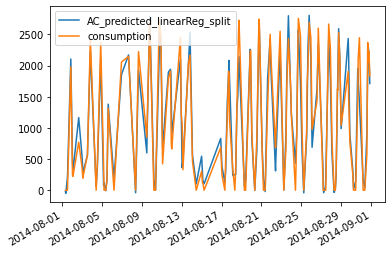

In [ ]:
predicted_DF_linearReg_split_august = predicted_DF_linearReg_split.loc["2014-08-01":"2014-08-31"]
predicted_DF_linearReg_split_august.plot()

###Calculating the accuracy

The visualization is not enough, I need to have a quantitative metric for accuracy

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
MAE_linearReg_split = mean_absolute_error(predicted_linearReg_split,y_test)
MSE_linearReg_split = mean_squared_error(predicted_linearReg_split,y_test)
R2_linearReg_split = r2_score(predicted_linearReg_split,y_test)

In [ ]:
print("MAE: " + str(MAE_linearReg_split) + " MSE: " + str(MSE_linearReg_split) + " R2: " + str(R2_linearReg_split))

MAE: 155.76286324413394 MSE: 63404.875149065054 R2: 0.878675610985771


Considering R2, the prediction is not that bad (0.87 of the real data).

But, the accuracy that I obtain depends on my random choice of train and test data.

###K-fold Cross validation

* Divide the dataset into 5 folds (it means 5 packets of row: e.g. 4000 row, each fold will have 800 row.) Choose the first one as test and the remaining ones as train.

* Then, choose the fold 2 as test, and 1, 3, 4, 5 as train.

* Then choose the fold 3 as test, and 1, 2, 4, 5 as train.

* In this way, each fold has played the role of test once, so you will have predictions for all of the data points, and your accurcay is not dependant upon to random choice of test or train.

In [ ]:
from sklearn.model_selection import cross_val_predict
predicted_linearReg_CV = cross_val_predict(linear_reg,DF_features,DF_target,cv=10)

Create a dataframe to compare:

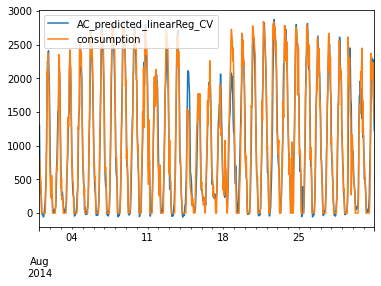

In [ ]:
predicted_DF_linearReg_CV = pd.DataFrame(predicted_linearReg_CV,index=DF_target.index,columns=["AC_predicted_linearReg_CV"])
predicted_DF_linearReg_CV = predicted_DF_linearReg_CV.join(DF_target)
predicted_DF_linearReg_CV_august = predicted_DF_linearReg_CV.loc["2014-08-01":"2014-08-31"]
predicted_DF_linearReg_CV_august.plot()

In [ ]:
MAE_linearReg_CV = mean_absolute_error(predicted_linearReg_CV,DF_target)
MSE_linearReg_CV = mean_squared_error(predicted_linearReg_CV,DF_target)
R2_linearReg_CV = r2_score(predicted_linearReg_CV,DF_target)

In [ ]:
print("MAE: " + str(MAE_linearReg_CV) + " MSE: " + str(MSE_linearReg_CV) + " R2: " + str(R2_linearReg_CV))

MAE: 162.89926082681507 MSE: 64542.27967988791 R2: 0.878138407891992


CV is better than Splitted!

##Other algorithm: **RANDOM FORESTS**

Such a complex algorithm if you go to its details. But lets implement it:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_RF = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import cross_val_predict
predicted_RF_CV = cross_val_predict(reg_RF,DF_features,DF_target,cv=10)

In [ ]:
MAE_RF_CV = mean_absolute_error(predicted_RF_CV,DF_target)
MSE_RF_CV = mean_squared_error(predicted_RF_CV,DF_target)
R2_RF_CV = r2_score(predicted_RF_CV,DF_target)
print("MAE: " + str(MAE_RF_CV) + " MSE: " + str(MSE_RF_CV) + " R2: " + str(R2_RF_CV))

MAE: 116.34652836809546 MSE: 48265.88656089447 R2: 0.9094358262763035


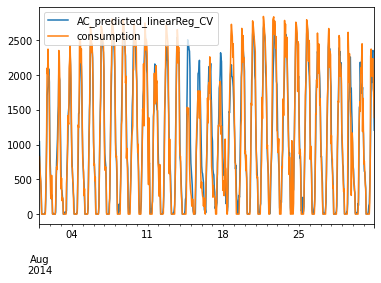

In [ ]:
predicted_DF_RF_CV = pd.DataFrame(predicted_RF_CV,index=DF_target.index,columns=["AC_predicted_linearReg_CV"])
predicted_DF_RF_CV = predicted_DF_RF_CV.join(DF_target)
predicted_DF_RF_CV_august = predicted_DF_RF_CV.loc["2014-08-01":"2014-08-31"]
predicted_DF_RF_CV_august.plot()

The result is good. But we should discuss about the middle data and etc.

#Assignment 12

* **Step 1; Featiure generation:** Try generating and adding other features that seems useful for you, based on your understanding of the problem and what you can observe in the plot. (e.g. holidays, lunchtime, TV time, school time, or additional condition that it should be weekend).
Here you are creating a soup of these features are really needed!

* **Step 2; Feature selection:** Experiment with different combinations of features and find the smallest combination of features that gives you the same (or even higher) accuracy.

**HINT:**

We can start from all features (we have this in DF_features, then I can start removing the ones that I guess they are useless, one by one, retraining the model and the I calculate the new R2 scores).

Then I calculate R2 scores and I see if the R2 scores is reduced or not, if R2 score is not reduced!

 * **Step3; Algorithm selection:** Once you have chosen the smallest set of features, do a  rapid research on available regressions models on sklearn and check if using another algorithm you can improve the accuracy (you can search for promissing  timeseries regression models in sklearn (e.g. extra trees, XGboost, suppoer vetor machines, neural network).
